### ***Defining the Question***

The task at hand is to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. In order to do so we need to study the data and find out which variables are our dependent and independent variables.

### ***Metric For Success***
To create a regression model that is able to predict with an accuracy of 80%.

### ***Context***
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

1.Multiple Linear Regression.

2.Quantile Regression

3.Ridge Regression

4.Lasso Regression.

5.Elastic Net Regression


### ***Experimental Design***

The experimental design of this project was in adherence to the CRISP-DM methodology. The project was conducted in the following phases:

1.Problem Understanding.

2.Data Understanding.

3.Data Preparation.

4.Modelling.

5.Conclusion

In addition, I will provide  observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 



# ***Data Preparation***


In [61]:
#Ill first import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [116]:
#Ill first load the dataset
#Ill preview the first 5 rows
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df.head(6)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [63]:
#Ill then check the shape of the dataset
df.shape
# 21613 rows and 20 columns


(21613, 20)

In [64]:
#Ill then check the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [65]:
#Ill then check the column name of the dataset
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# ***Data Cleaning***


In [66]:
#ILl then check if their is any missing values in the dataset
df.isna().any()
#No missing values in the dataset

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [67]:
#Ill then check is their is any duplicates 
df.duplicated().sum()
#Initially their was 3 duplicated values,i proceeded to drop them

3

In [68]:
#Ill then proceed to drop the duplicates
df.drop_duplicates(inplace=True)

In [69]:
#Ill then check the datatype of the columns
df.dtypes
#Intresting

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [70]:
#ILl then proceed to check for null values
df.isnull().sum()
#No null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [71]:
#Ill then drop unnecessary column names
df = df.drop(columns=['id', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


In [72]:
#Ill then move the dependent variable which is the price to be the last column name and zip code to be the first
df = df[['zipcode','yr_renovated', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
               'price']]
df.head()               

,zipcode,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,price
0,98178,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,221900.0
1,98125,1991,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,538000.0
2,98028,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,180000.0
3,98136,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,604000.0
4,98074,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,510000.0


In [73]:
#Ill then check for unique values in some of the column names
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [74]:
#Ill then check for unique values in some of the column names
df.view.unique()

array([0, 3, 4, 2, 1])

***Our dataset is now cleaned***

# ***Exploratory Data Analysis***

Exploratory Data Analysis (EDA) is an approach to data analysis with the aim of summarizing the data's main characteristics. in other words, we can define EDA as the ***process of*** ***performing initial investigation to data so as to unravel patterns, spot anomalies, test hypothesis and to check assumptions***. All these can be done with the help of summary statistics and graph representation.




### ***Univariative Analysis***

In [75]:
#Ill first use the describe function in the dataset
df.describe(include='all')
#The describe function returns a pandas series type that provides descriptive statistics which 
# summarize the central tendency, dispersion, and shape of a 
# dataset’s distribution, excluding NaN values. 

,zipcode,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,price
count,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,2.161000e+04
mean,98077.945673,84.322351,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,5.401789e+05
std,53.505373,401.499264,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,3.673876e+05
min,98001.000000,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,7.500000e+04
25%,98033.000000,0.000000,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,3.216125e+05
50%,98065.000000,0.000000,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,4.500000e+05
75%,98118.000000,0.000000,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,6.450000e+05
max,98199.000000,2015.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,7.700000e+06


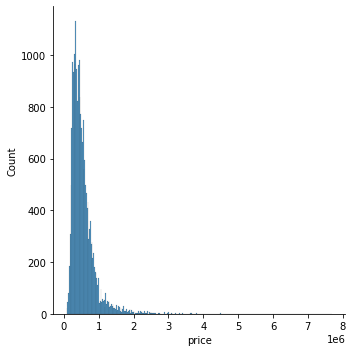

In [76]:
#Ill then check for skwedness in the dataset using our dependent variable
sb.displot(df.price)
#It is positively skewed to the left.

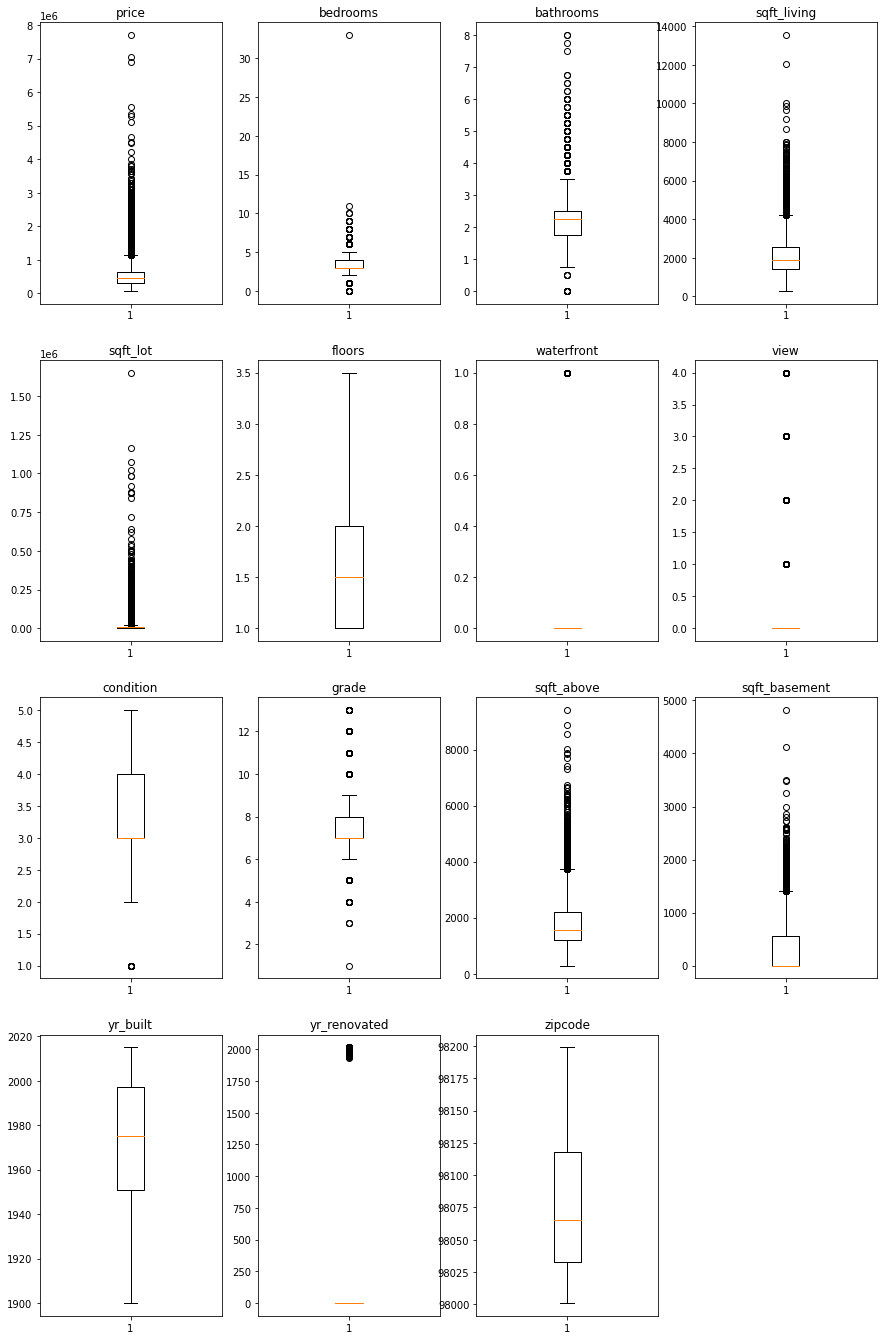

In [77]:
#ILl then for outliers in the price column
df_outlier = {'price': 1, 'bedrooms': 2, 'bathrooms': 3, 'sqft_living': 4, 'sqft_lot': 5,
       'floors': 6, 'waterfront': 7, 'view': 8, 'condition': 9, 'grade': 10, 'sqft_above': 11,
       'sqft_basement': 12, 'yr_built': 13, 'yr_renovated':14, 'zipcode': 15}

plt.figure(figsize=(15,30))

# make a boxplot for each numerical column
for variable,i in df_outlier.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()
#Their is presence of ouliers in the column names

### ***Bivariate Analysis***
Bivariate analysis involves two different variables. It aims to find out the causes and relationships between those two variables. 



In [78]:
#Ill first load the dataset
df.head()

,zipcode,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,price
0,98178,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,221900.0
1,98125,1991,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,538000.0
2,98028,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,180000.0
3,98136,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,604000.0
4,98074,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,510000.0


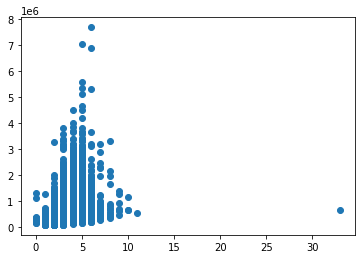

In [79]:
#Ill then plot a scatter plot to show the relationship between price variable and bedroom
plt.scatter(df["bedrooms"] , df["price"])
#It is not strongly corelated though their is some relationship

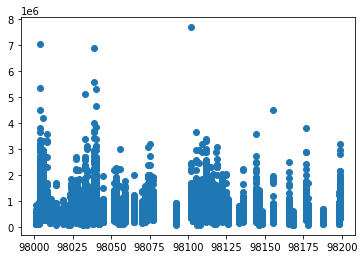

In [80]:
#Ill then plot a scatter plot for the variables zipcode and price
plt.scatter(df["zipcode"] , df["price"])
#It does not show any linearity.


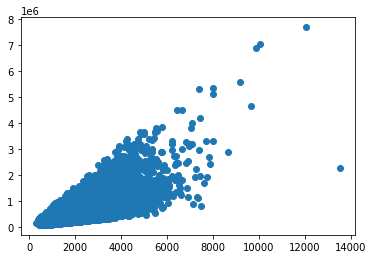

In [81]:
#Ill then plot a scatter plot for the sqft_living and price
plt.scatter(df["sqft_living"] , df["price"])
#Their seems to be a linearity hence they are related

***Correlation***

Correlation is a statistical measure that describes the association between random variables. 

In [82]:
#Ill then check the correlation between the numeric variables
df["price"].corr(df["bedrooms"]) 
#Upon checking the corelation of the price and bedroom, it shows a positive corelation though not strong

0.3083461828688016

In [83]:
#Ill then checck the correlation between price and bathroom
df['price'].corr(df['bathrooms'])
#0.5251399153586779 means that the variables(price,bathroom) are strongly corelated.



0.5251399153586779

In [84]:
#Ill then check the overall correlation of the columns
corr = df.corr()
corr
#INTRESTING!!!

,zipcode,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,price
zipcode,1.000000,0.064388,-0.152721,-0.203831,-0.199435,-0.129611,-0.059025,0.030277,0.084838,0.002962,-0.184795,-0.261163,0.074781,-0.346808,-0.053162
yr_renovated,0.064388,1.000000,0.018695,0.050879,0.055314,0.007677,0.006156,0.092950,0.103208,-0.060862,0.014372,0.023233,0.071320,-0.224729,0.126503
bedrooms,-0.152721,0.018695,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.308346
bathrooms,-0.203831,0.050879,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.525140
sqft_living,-0.199435,0.055314,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.702046
sqft_lot,-0.129611,0.007677,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.089658
floors,-0.059025,0.006156,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.256793
waterfront,0.030277,0.092950,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.266332
view,0.084838,0.103208,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.397466
condition,0.002962,-0.060862,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,0.036397


***Conclusion***
 
Sqft_living seems to be highly correlated with sqft_above (0.876), and price seems to be highly correlated with sqft_living (0.702), sqft_above (0.605), and bathrooms (0.51).Correlation coefficients between -.20 and .20 are generally considered weak, 
between .20 and .50 (positive or negative) are considered moderate, 
and above .50 (positive or negative) are considered strong. Above result shows that the correlation coefficient is strong.

# ***Machine Learning***

I will perform various regression models which are:


1.   Multiple Linear Regression
2.   Quantile Regression
3.   Ridge Regression
4.   Lasso Regression
5.   Elastic Net Regression



### **Multiple Linear Regression**

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In [85]:
#Ill load the dataset
df.head()

,zipcode,yr_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,price
0,98178,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,221900.0
1,98125,1991,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,538000.0
2,98028,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,180000.0
3,98136,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,604000.0
4,98074,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,510000.0


***Multicollinearity***

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. 

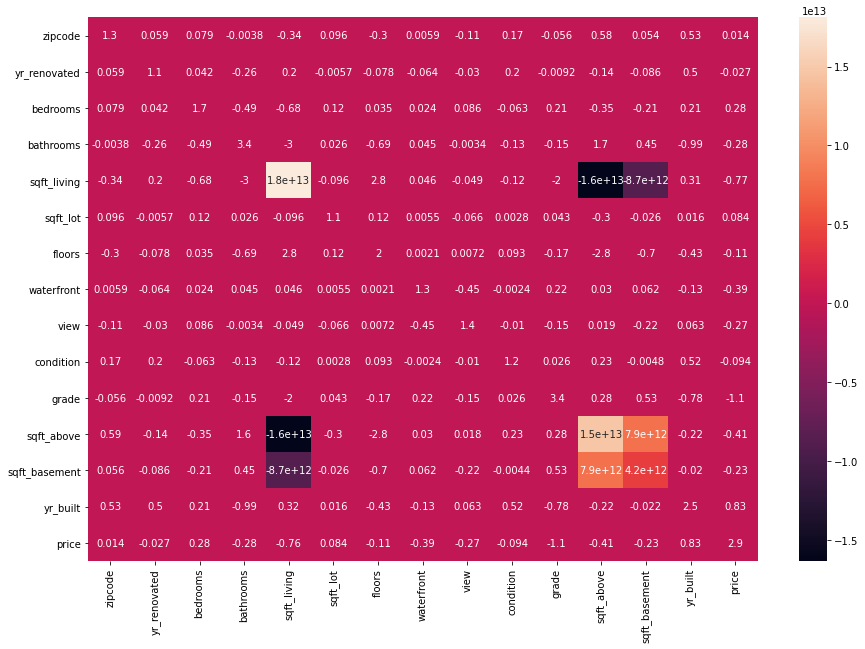

In [86]:
#Ill then plot a heatmap to display yhe results
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)

In [87]:
#Ill then detect if their is any multicollinearity in the dataset for each column
# Import library for VIF
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [88]:
#Ill then print out the VIF for each column.
X = df.iloc[:,:-1]
calc_vif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,zipcode,8539.840508
1,yr_renovated,1.189751
2,bedrooms,23.183074
3,bathrooms,28.528252
4,sqft_living,inf
5,sqft_lot,1.202899
6,floors,16.233694
7,waterfront,1.211193
8,view,1.509493
9,condition,34.562540


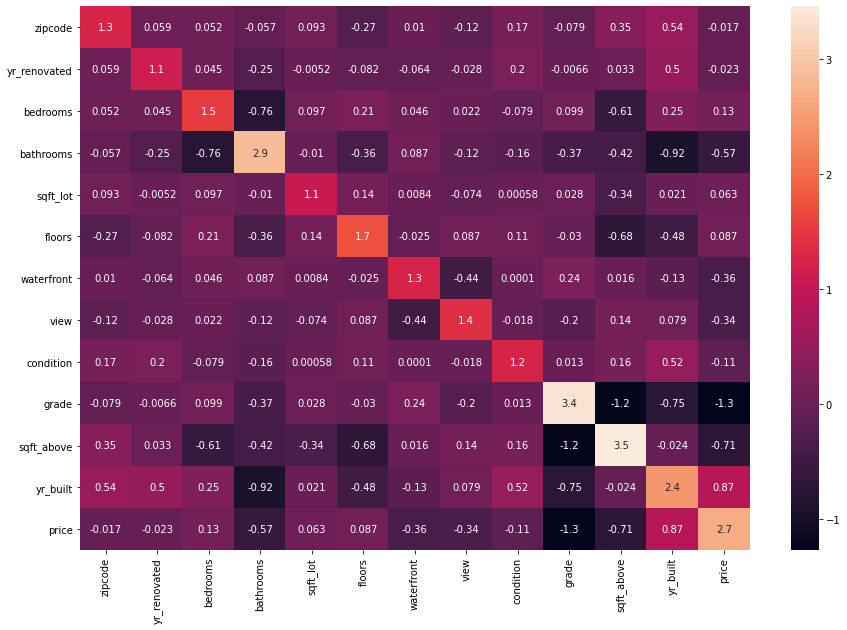

In [89]:
#Ill then drop columns so that to improve the VIF score
df_2 = df.drop(columns = ['sqft_living', 'sqft_basement'])
corr2 = df_2.corr()
vif2 = pd.DataFrame(np.linalg.inv(corr2.values), index = corr2.index, columns = corr2.columns)
#Ill then use a heatmap to show the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif2, annot = True)

In [90]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder().fit(df_2['grade'].unique())
encoder = label.classes_
df_2['grade'] = label.transform(df_2['grade'].values)

In [91]:
#Ill then proceed to train our model by splitting it into train and test
X= df_2.drop(columns = ['price'])
Y = df_2['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)


In [92]:
#Ill then train our model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
# Ill then now start making predictions with our model
predict = reg.predict(X_test)

# check the difference between the actual value and predicted value
df = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
prediction_df = df.head(15)
prediction_df

,Actual,Predicted
13410,269000.0,1.503293e+05
13564,299000.0,3.400905e+05
14037,1080000.0,8.690271e+05
5586,365000.0,3.448369e+05
7969,500000.0,6.516886e+05
20899,312000.0,2.129639e+05
4642,295000.0,3.303292e+05
3837,395000.0,4.789484e+05
13193,363000.0,6.220130e+05
7966,355500.0,2.767459e+05


In [94]:
#Ill then calculate the models accuracy
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predict))
print("Root Mean Squared Error:", RMSE)
mean = 0.1 * df_2.price.mean()
print("10% of the mean:", mean)
#The model is not accurate enough.

Root Mean Squared Error: 229764.7946235462
10% of the mean: 54017.894484035176


***Create residual plots for your models, and assess heteroskedasticity using Barlett's test.***

In [95]:
residuals = np.subtract(predict, y_test)
residuals.mean()

-2213.132680867485

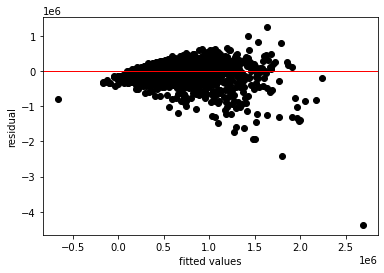

In [96]:
#Ill then plot the residuals
plt.scatter(predict, residuals, color = 'black')
plt.figsize = [12, 10]
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color = 'red', linewidth = 1)
plt.show()

In [97]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(predict, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

Test result: 242.15640417423913
P-value: 1.3320537191769946e-54


## ***Quantile Regression***

In [98]:
#Ill first import the necessary libraries for quantile regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [99]:
df_2.head()

,zipcode,yr_renovated,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,price
0,98178,0,3,1.00,5650,1.0,0,0,3,5,1180,1955,221900.0
1,98125,1991,3,2.25,7242,2.0,0,0,3,5,2170,1951,538000.0
2,98028,0,2,1.00,10000,1.0,0,0,3,4,770,1933,180000.0
3,98136,0,4,3.00,5000,1.0,0,0,5,5,1050,1965,604000.0
4,98074,0,3,2.00,8080,1.0,0,0,3,6,1680,1987,510000.0


In [100]:
#Ill then use the LAD model(Least Absolute Deviation)
mod = smf.quantreg("bathrooms ~ price", df_2)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              bathrooms   Pseudo R-squared:               0.1328
Model:                       QuantReg   Bandwidth:                      0.1233
Method:                 Least Squares   Sparsity:                        1.792
Date:                Sun, 25 Jul 2021   No. Observations:                21610
Time:                        13:32:16   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4937      0.011    137.822      0.000       1.472       1.515
price       1.211e-06   1.66e-08     73.009      0.000    1.18e-06    1.24e-06

The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


In [101]:
#Ill then prepare data for plotting
quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["price"]] + res.conf_int().loc[
        "price"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("bathrooms ~ price", df_2).fit()
ols_ci = ols.conf_int().loc["price"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["price"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

      q         a             b            lb            ub
0  0.05  0.810289  4.475860e-07  4.417727e-07  4.533993e-07
1  0.15  0.746162  1.066548e-06  1.033554e-06  1.099542e-06
2  0.25  0.975610  1.219512e-06  1.150328e-06  1.288696e-06
3  0.35  1.241261  1.165499e-06  1.127948e-06  1.203050e-06
4  0.45  1.422618  1.190479e-06  1.156756e-06  1.224202e-06
5  0.55  1.631565  1.147373e-06  1.115997e-06  1.178750e-06
6  0.65  1.834761  1.074347e-06  1.047859e-06  1.100835e-06
7  0.75  2.002732  1.052321e-06  1.029998e-06  1.074643e-06
8  0.85  2.093136  1.225491e-06  1.205010e-06  1.245973e-06
9  0.95  2.186375  1.718363e-06  1.679709e-06  1.757016e-06
{'a': 1.520044203568708, 'b': 1.1009209986443412e-06, 'lb': 1.0771315741960742e-06, 'ub': 1.1247104230926082e-06}


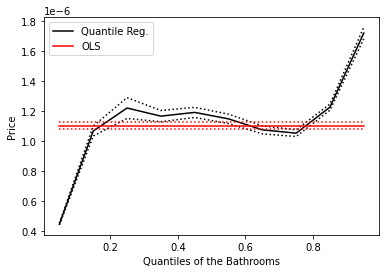

In [102]:

n = models.shape[0]
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")
p4 = plt.plot(models.q, [ols["b"]] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols["lb"]] * n, linestyle="dotted", color="red")
p6 = plt.plot(models.q, [ols["ub"]] * n, linestyle="dotted", color="red")
plt.ylabel("Price")
plt.xlabel("Quantiles of the Bathrooms")
plt.legend()
plt.show()
# The dotted black lines form 95% point-wise confidence band 
# around 10 quantile regression estimates (solid black line).
# The red lines represent OLS regression results along with their 95% confidence interval.

## ***Ridge Regression***


In [104]:
#Sice I was getting inconsistent samples, I had to use the iloc function to more specification
X = df_2.iloc[:,1:-1].values
y = df_2.iloc[:,-1] .values

In [110]:
#Ill start by creating our baseline regression model
# This is a model that has no regularization to it
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [111]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

50461637053.72277

In [106]:
# Ill first determine the most appropriate value for the L2 regularization 
from sklearn.linear_model import Ridge
ridge = Ridge(normalize = True)

In [113]:
#Ill then set up the grid search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = ridge, param_grid = {'alpha' : np.logspace(-5, 2, 8)},
                      scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True, cv = 10)


In [112]:
#  we will fit our variables to the grid search and then use it to get the best parameters and the
# best score that will allow us to determine the model's strength
grid_search.fit(X, y)

print("Best Params:", grid_search.best_params_)
print("Best Score:", abs(grid_search.best_score_))


Best Params: {'alpha': 0.01}
Best Score: 50461637053.72277


## ***Lasso Regression***

In [117]:
# Ill  first scale the  data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns = ['price'])
y = df['price']

X_scaled = scaler.fit_transform(X)

In [118]:
#Ill then now create our Lasso model
from sklearn.linear_model import Lasso

lasso = Lasso(tol = 0.0001)
lasso_model = lasso.fit(X, y)

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.699852415367876
lasso MSE: 40504545903.99711
lasso coef: [-1.29431706e-06 -3.57936445e+04  4.11748806e+04  2.85038810e+02
  1.21575327e-01  6.76966474e+03  5.82555816e+05  5.31003664e+04
  2.62779268e+04  9.61054866e+04 -1.03838692e+02 -1.34829567e+02
 -2.62457663e+03  1.96575969e+01 -5.82260389e+02  6.02365068e+05
 -2.12925464e+05  2.16169525e+01 -3.96371049e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398627267700614.0, tolerance: 291664766083.6765
  positive)


In [125]:
# splitting the data into training and test sets, building Lasso, and choosing the regularization 
# parameter with the help of GridSearch
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


linear = LinearRegression()
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("-------------------------------------------------")

print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("-------------------------------------------------")

print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("-------------------------------------------------")

print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

KeyboardInterrupt: ignored

## **Elastic Net Regression**

In [121]:
# ILl first check our baseline model's coefficients
coef_dict_baseline = {}
for coef, feat in zip(reg.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 100742.57655948533,
 'bedrooms': -18770.61506093743,
 'condition': 147398.40869115666,
 'floors': 571697.5875056444,
 'grade': 115.19790034765106,
 'id': 7.650898572896922,
 'sqft_above': -4040.541256970541,
 'sqft_living': -0.2112010762502905,
 'sqft_lot': -21082.36531448636,
 'view': 23025.543811485775,
 'waterfront': 61433.00563466954}

In [123]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize = True)
grid_search = GridSearchCV(estimator = elastic, param_grid = {'alpha' : np.logspace(-5, 2, 8),
                                                         'l1_ratio':[.2, .4, .6, .8]}, 
                      scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True, cv = 10)

In [124]:

grid_search.fit(X_train, y_train)
print("Best Parameter:", grid_search.best_params_)
print("Best score:", abs(grid_search.best_score_))

Best Parameter: {'alpha': 1e-05, 'l1_ratio': 0.8}
Best score: 40625327084.974495


### **Recommedation**

From the above models that were tried,Multiple Linear regression would be the ideal model to go with since it is more accurate than the rest